## **Muhammad Daffa Putra Mahardika**
## **2009106036**
## **Posttest 5**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("bodyPerformance2.csv")

df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,F,M
0,27,M,172.3,75.0,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0.0,1.0
1,25,M,165.0,55.0,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0.0,1.0
2,31,M,179.6,78.0,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0.0,1.0
3,32,M,174.5,71.0,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0.0,1.0
4,28,M,173.8,67.0,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0.0,1.0


**Membuang atribut F dan M serta 'class' sebagai label**

In [2]:
x = df.drop(['F','M'],axis=1)
y = df['class']



**Encoding**

In [3]:
X = pd.get_dummies(x)
X.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_F,gender_M,class_A,class_B,class_C,class_D
0,27,172.3,75.0,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,1,0,0,1,0
1,25,165.0,55.0,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,1,1,0,0,0
2,31,179.6,78.0,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,1,0,0,1,0
3,32,174.5,71.0,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1,0,1,0,0
4,28,173.8,67.0,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1,0,1,0,0


# **K-Nearest Neighbour (KNN)**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

modelknn = KNeighborsClassifier(n_neighbors = 5)

modelknn.fit(x_train, y_train)

knn_train = modelknn.score(x_train,y_train)
knn_test = modelknn.score(x_test,y_test)


In [5]:
modelknn.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
print('Akurasi test set model KNN dengan jumlah neighbors = 5     : ', round(modelknn.score(x_test, y_test),3))
print('Akurasi training set model KNN dengan jumlah neighbors = 5 : ', round(modelknn.score(x_train, y_train),3) )

Akurasi test set model KNN dengan jumlah neighbors = 5     :  0.533
Akurasi training set model KNN dengan jumlah neighbors = 5 :  0.677


# **Support Vector Machine (SVM)**

In [7]:
from sklearn.svm import SVC

In [8]:
modelsvm = SVC(kernel='rbf')

modelsvm.fit(x_train,y_train)

svm_train = modelsvm.score(x_train,y_train)
svm_test = modelsvm.score(x_test,y_test)

print("Akurasi Training Set (SVM) : ", round(modelsvm.score(x_train,y_train),3))
print("Akurasi Test Set (SVM)     : ", round(modelsvm.score(x_test,y_test),3))

Akurasi Training Set (SVM) :  0.57
Akurasi Test Set (SVM)     :  0.543


# **Membandingkan dua algoritma yang digunakan**

- Membandingkan akurasi training

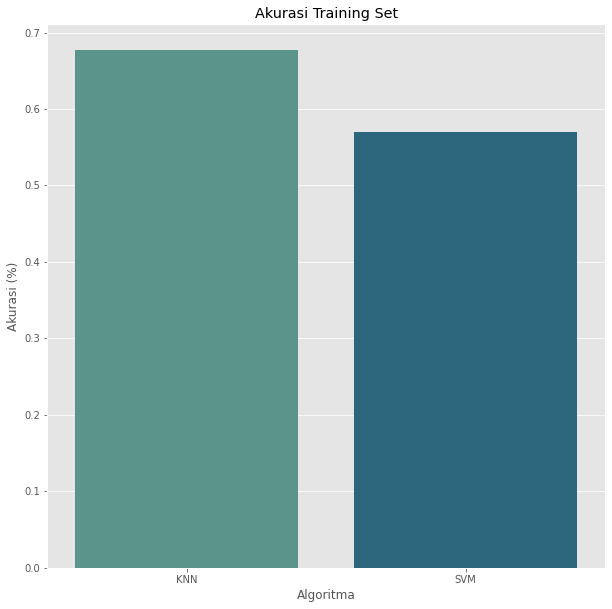

In [35]:
algoritma = ["KNN","SVM"]
pred_train = [knn_train,svm_train]
plt.figure(figsize=(10,10))
sns.barplot(x= algoritma, y= pred_train,palette='crest')
plt.title("Akurasi Training Set")
plt.xlabel("Algoritma")
plt.ylabel("Akurasi (%)")
plt.show()

- Membandingkan akurasi test set

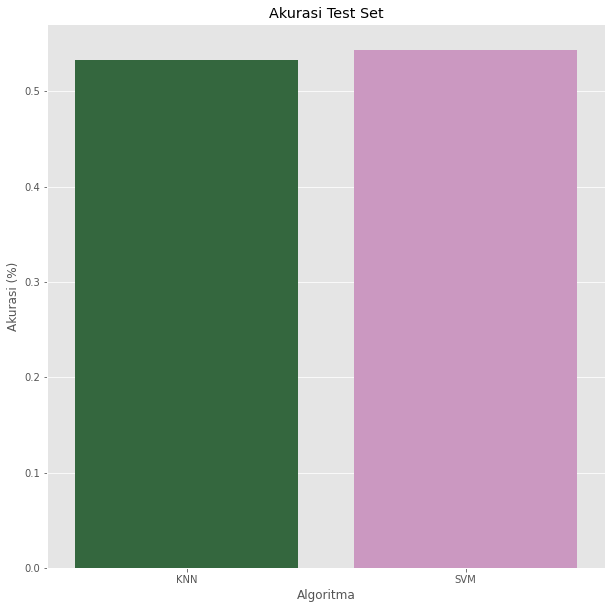

In [38]:
algoritma = ["KNN","SVM"]
pred_test = [knn_test,svm_test]
plt.figure(figsize=(10,10))
sns.barplot(x= algoritma, y= pred_test,palette='cubehelix')
plt.title("Akurasi Test Set")
plt.xlabel("Algoritma")
plt.ylabel("Akurasi (%)")
plt.show()

In [37]:
## Simpan dataset dengan attribute bertipe angka ke dalam file CSV.

df.to_csv("Posttest5.csv", index=False)